# Homework 8 - Clustering
In this assignment, you will be preforming the specified clustering methods in python

---

### Step 1: Load Data

- Load the following attributes from `Player_Attributes`:
  - `gk_reflexes`
  - `gk_kicking`

These values will be used for clustering.

---

### Step 2: Clustering

 - Apply Kmeans  (5 clusters), plot the results
 - Use the Elbow technique, and report the optimal K value
 - Run Kmeans again, with the k value from the previous step. Plot your results.


### Dataset Overview
The dataset covers information about soccer players in sqlite format. This file is located in the `Datasets` directory of this repository. The file is called `fifa_soccer_dataset.sqlite.gz`. **This is the same file from the previous homework (assignment 4).**

If you haven't decompressed the file, you may need to follow the instructions below to decompress it.

**IMPORTANT** The database is compressed and needs to be decompressed before use. You can do this by running the following command in your terminal on Linux or MacOS:

```bash
gunzip Datasets/fifa_soccer_dataset.sqlite.gz
```

If you are using Windows, you can use the following command in your powershell:

```powershell
$sourceFile = "$PWD\Datasets\fifa_soccer_dataset.sqlite.gz"
$destinationFile = "$PWD\Datasets\fifa_soccer_dataset.sqlite"

$inputStream = [System.IO.File]::OpenRead($sourceFile)
$outputStream = [System.IO.File]::Create($destinationFile)
$gzipStream = New-Object System.IO.Compression.GzipStream($inputStream, [System.IO.Compression.CompressionMode]::Decompress)
$gzipStream.CopyTo($outputStream)

$gzipStream.Close()
$outputStream.Close()
$inputStream.Close()
```

Alternatively, you can extract the file using the GUI of your operating system.


### Submission Guidelines

- Submit your completed notebook as a HTML export, or a PDF file.

To export to HTML, if you are on Jupyter, select `File` > `Export Notebook As` > `HTML`.

If you are on VSCode, you can use the `Jupyter: Export to HTML` command.
 - Open the command palette (Ctrl+Shift+P or Cmd+Shift+P on Mac).
     - Search for `Jupyter: Export to HTML`.
     - Save the HTML file to your computer and submit it via Canvas.

---


In [22]:
import sqlite3
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import os

# Local directory
print(os.getcwd())

c:\Ricardo\2025-02 SP25 USABLE ARTIFICIAL INTELLIGENCE\GitHub\usable_ai\Homework


In [23]:
dataset_path = "../Database/fifa_soccer_dataset.sqlite" # Fix your path accordingly

# Your Code Here

First, let's connect to the database as we've done in previous guides below.

In [24]:
conn = sqlite3.connect(dataset_path)

In [25]:
# Check database table list

cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch and print all table names
tables = cursor.fetchall()
for table in tables:
    print(table[0])

sqlite_sequence
Player_Attributes
Player
Match
League
Country
Team
Team_Attributes
stories
information
word_counts


From the database, grab `gk_reflexes` and `gk_kicking` from the `Player_Attributes` table.

In [26]:
# get only `gk_reflexes` and `gk_kicking
player_attr_df = pd.read_sql("SELECT gk_reflexes, gk_kicking FROM Player_Attributes;", conn)

player_attr_df.head()

,gk_reflexes,gk_kicking
0,8.0,10.0
1,8.0,10.0
2,8.0,10.0
3,7.0,9.0
4,7.0,9.0


Now, let's drop the missing values.

In [27]:
# drop the null values
player_attr_df = player_attr_df.dropna()
player_attr_df.head()


,gk_reflexes,gk_kicking
0,8.0,10.0
1,8.0,10.0
2,8.0,10.0
3,7.0,9.0
4,7.0,9.0


Let's run the `KMeans()` function, using `n_clusers = 5` as our starting cluster count below.

In [28]:
km = KMeans(n_clusters = 5, init = 'random', n_init = 10, max_iter= 300, tol=1e-04, random_state=1)
ykm = km.fit_predict(player_attr_df)

Plot the results using the `scatter()` function, passing `player_attr_df.gk_handling` and `player_attr_df.gk_kicking` as the first two arguments.

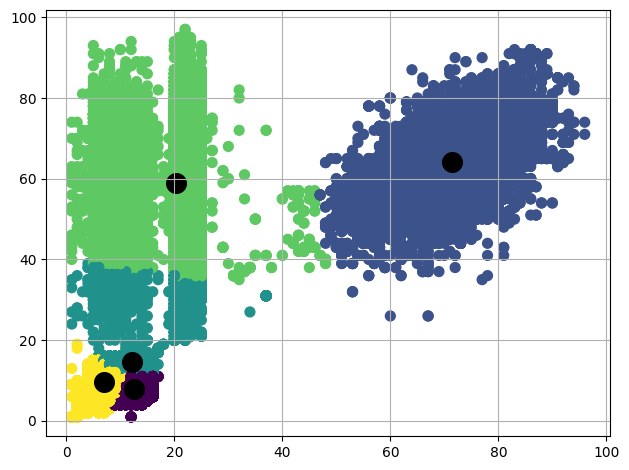

In [29]:
plt.scatter(player_attr_df.gk_reflexes, player_attr_df.gk_kicking, c=ykm, marker='o', s = 50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c ='black', s = 200)

plt.grid()
plt.tight_layout()
plt.show()

Above we can see the 5 centroids from the clustering. It looks like we can probably choose a better cluster number. Let's run the elbow method below to find a better cluster count. Once done, plot the distance in the `plt.plot()` so we can see which value to use.

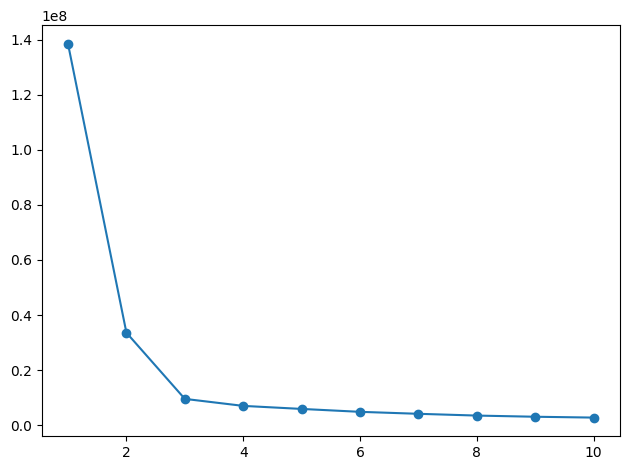

In [30]:
dist= []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter= 300, random_state=0)
    km.fit(player_attr_df)
    dist.append(km.inertia_)

# Pass dist where the parameter underscore is below
plt.plot(range(1,11), dist, marker = 'o')
plt.tight_layout()
plt.show()

Looks like we should use 2! In the cell below, run `KMeans()` again, same as previously in this guide, and use 2 clusters.

In [31]:
# km = # Run KMeans again here
# Run KMeans with 2 clusters , init random or k-means++ ???

km = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10, max_iter= 300, random_state=0)

# ykm = # Fit Predict Here
# Fit and predict cluster labels

ykm = km.fit_predict(player_attr_df)


Lastly, plot your results.

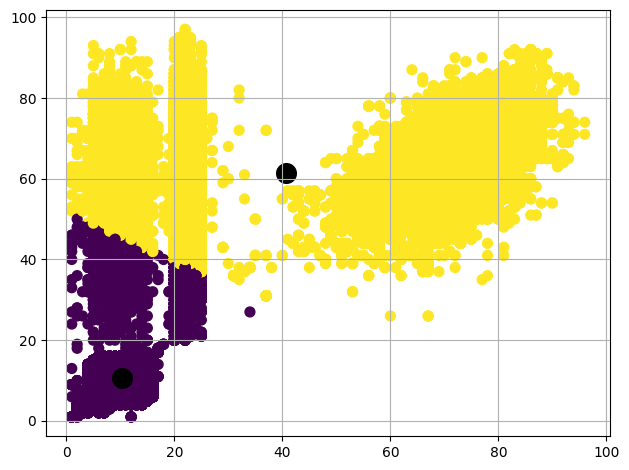

In [35]:
# Plot as we did before

plt.scatter(player_attr_df.gk_reflexes, player_attr_df.gk_kicking, c=ykm, marker='o', s = 50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c ='black', s = 200)

plt.grid()
plt.tight_layout()
plt.show()